<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Iterables, Iterators and Generators



# Iterables, Iterators
<hr style = "border:2px solid black" ></hr>


- An **iterator** is:
    - Object which defines a `__next__` method and will produce the next value when we call `next()` on it. If there are no further items, it raises the `StopIteration` exception.
    - Object that is self-iterable (meaning that it has an __iter__ method that returns self).
- An **iterable** is anything that can be looped over. It either:
    - Has an `__iter__` method which returns an iterator for that object when you call iter() on it, or implicitly in a for loop.
    - Defines a `__getitem__` method that can take sequential indexes starting from zero (and raises an IndexError when the indexes are no longer valid)




# `__iter__` and `__next__` dunder methods
<hr style = "border:2px solid black" ></hr>

    
- We'd like to know more on how python treat the following statement: `for obj in object` loop. 
- The expression above actually calls the `iter` function on the object.
- This actually translates to calling the `.__iter__()` dunder method, this method must return the the iterator object.
- After that the loop will repeatedly call the iterator object's `__next__` method to retrieve values from it. - Often, for pragmatic reasons, iterable classes will implement both `__iter__()` and `__next__()` in the same class, and have `__iter__()` return self, which makes the class both an iterable and its own iterator. 



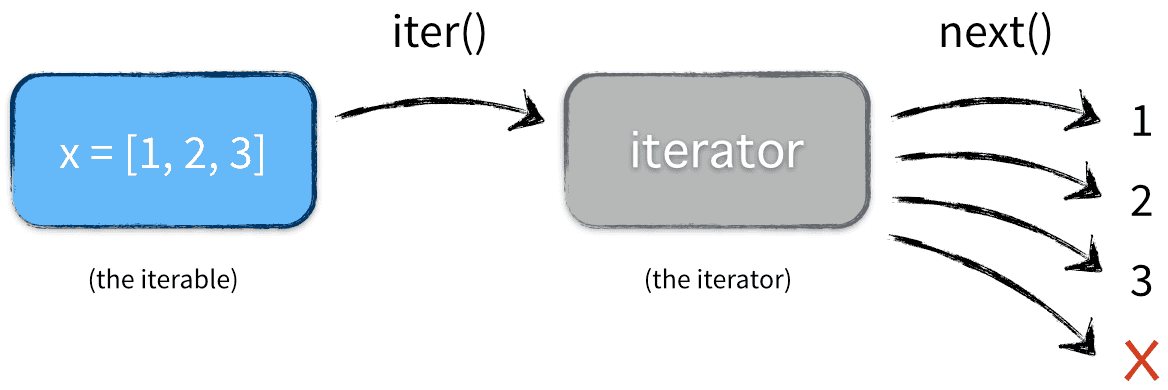

# Example
<hr style = "border:2px solid black" ></hr>

    
- When Python sees a statement like `for obj in object` it will first call `iter(object)` to make it a iterator.
- The code below prints the number 1, 2, 3 and then stops. The question now is, how does the loop constructs the work behind the scenes. i.e. How does the loop fetch individual elements from the object it is looping over and know when to stop?
- The answer to the question is Python's iterator protocol: Objects that support the __iter__ and __next__ dunder methods automatically work with for-in loops.



In [1]:
x = [1, 2, 3]
for element in x:
    print(element)

1
2
3


    
- The built-in function `iter` takes an iterable object and returns an iterator.
- Then we can now loop through all available elements using the `next` built-in function.
- Each time we call the next method on the iterator, it will give us the next element.
- If there are no more elements in the iterator, the iterator will raise an error. We can catch this by raising a StopIteration exception.
    


In [2]:
iterator = iter(x)

# here x is the iterable
print(type(x))
print(type(iterator))

<class 'list'>
<class 'list_iterator'>


In [3]:

print(next(iterator))
print(next(iterator))
print(next(iterator))

1
2
3


In [4]:
try:
    print(next(iterator))
except StopIteration as e:
    print('StopIteration raised')

StopIteration raised


# Generators
<hr style = "border:2px solid black" ></hr>

    
- A generator is an object that lazily produces values (i.e. generates values on demand). 
- Unlike list comprehension; the elements are lazily evaluated, i.e. they take up **less memory** since they are not created all at once, but instead return one element at a time whenever needed
- A generator is either:

- A function that contains the `yield` keyword (yield expression).
    - When this function is called, it does not execute, but returns a generator object.
    - When the end-user invokes the `next()` method on the function: It will execute the function, and when the function encounters the `yield` keyword, it suspends execution at that point, saves its context and returns the value to the caller.
    - When the caller invokes `next()` again, execution of the function continues till another yield is encountered or end of function is reached.
    
- A generator expression, i.e. a syntactic construct for creating an anonymous generator object. These are like list comprehensions but enclosed in `()` instead of `[]`.



## Create a generator with `()`

In [3]:
nloop = 3
generator = (x ** 2 for x in range(nloop))

In [5]:
print(generator)

<generator object <genexpr> at 0x7f863a1cac80>


In [6]:
# the real processing happens during the iteration
for value in generator:
    print(value)

0
1
4


## Create a generator with `yield`

In [7]:
# generator function:
def gen(nloop):
    for x in range(nloop):
        yield x ** 2


generator = gen(nloop)
for value in generator:
    print(value)

0
1
4


# Iterator gives no warning if exhasuted
<hr style = "border:2px solid black" ></hr>

    
- One important thing to note about generator is that it only produces the result a single time.
- In other words, once we're done iterating through the generator for the first time, we won't get any results the second time around.



In [10]:
nloop = 3
generator = (x ** 2 for x in range(nloop))

In [11]:
for value in generator:
    print(value)

0
1
4


In [12]:
# no results because the iterator has exhausted
for value in generator:
    print(value)

# From iterator to list
<hr style = "border:2px solid black" ></hr>

    
- From the result, we can see that when we iterate over an already-exhausted generator, it won't produce any results and we also won't get any errors that tells us it is now exhausted.
- This is something that's extremely important to keep in mind when working with generators.
- If we wish to iterate over the content for more than once, we can always make a copy by converting it to a list.



In [10]:
# we can now loop through it for more than once
iterable = list(gen(nloop))
for value in iterable:
    print(value)

for value in iterable:
    print(value)

0
1
4
0
1
4


# Conclusions
<hr style = "border:2px solid black" ></hr>


- The real advantage or true power of using generator is it gives us the ability to iterate over sequence lazily, which in turn reduces memory usage.
- For example, imagine a simulator producing gigabytes of data per second. Clearly we can't put everything neatly into a Python list first and then start munching, since this copy could cause our program to run out of memory and crash.
- Ideally, we must process the information as it comes in. The recommended way to deal with this, is to have a class that implements the `__iter__` dunder method.



# References
<hr style = "border:2px solid black" ></hr>


- http://nbviewer.jupyter.org/github/ethen8181/machine-learning/blob/master/python/iterator/iterator.ipynb
- [Blog: Be Defensive When Iterating Over Arguments](http://www.effectivepython.com/2015/01/03/be-defensive-when-iterating-over-arguments/)
- [Blog: Python Iterators: A Step-By-Step Introduction](https://dbader.org/blog/python-iterators)
- [Blog: Data streaming in Python: generators, iterators, iterables](https://rare-technologies.com/data-streaming-in-python-generators-iterators-iterables/)
- [Notebook: Using functional programming in Python like a boss: Generators, Iterators and Decorators](http://nbviewer.jupyter.org/github/akittas/presentations/blob/master/pythess/func_py/func_py.ipynb)
- https://www.kdnuggets.com/2022/01/understanding-iterables-iterators-python.html

